# SENTIMENT ANALYSIS

## Step 1: Importing Libraries


The project begins by importing necessary libraries:


- pandas for data manipulation and analysis
- re for regular expressions
- nltk for natural language processing
- emoji for handling emojis
- sklearn for machine learning
- keras for deep learning
- matplotlib for visualization
- numpy for numerical computations



In [1]:
#  Import Libraries
import pandas as pd
import re
import nltk
import emoji
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Bidirectional
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Download necessary nltk data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vaish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vaish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vaish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Step 2: Loading Dataset


The project loads a sentiment analysis dataset from a CSV file:


- The dataset contains three columns: Index, message, and label
- Index is a unique identifier for each row
- message is the text to be analyzed
- label is the sentiment label (0 for non-depressive, 1 for depressive)



In [3]:
# Load Dataset

data = pd.read_csv("C:\\Users\\vaish\\Downloads\\archive (1)\\sentiment_tweets3.csv")
data.columns = ['Index', 'message', 'label']  # Adjust column names if needed
data.head()

,Index,message,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


## Step 3: Data Preprocessing


The project preprocesses the text data:


- Removes special characters and punctuation using regular expressions
- Handles emojis using the emoji library
- Converts chat words to their full forms using a custom dictionary
- Tokenizes text into individual words using NLTK
- Removes stopwords (common words like "the," "and," etc.)
- Lemmatizes words to their base form using NLTK


In [4]:
# Initialize Lemmatizer and Stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [5]:
# Dictionary for chat words
chat_words_dict = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

# Function to handle emojis
def handle_emojis(text):
    return emoji.demojize(text)

# Function to handle chat words
def handle_chat_words(text, chat_words_dict):
    words = text.split()
    new_words = []
    for word in words:
        if word.lower() in chat_words_dict:
            new_words.append(chat_words_dict[word.lower()])
        else:
            new_words.append(word)
    return ' '.join(new_words)

## Step 4: Cleaning and Preprocessing Text


The project defines a function clean_text to perform the preprocessing steps:


- Handles emojis
- Handles chat words
- Removes URLs, @mentions, and hashtags
- Removes punctuation
- Converts text to lowercase
- Tokenizes text
- Removes stopwords
- Lemmatizes words


In [6]:
# Function to clean and preprocess text
def clean_text(text):
    text = handle_emojis(text)  # Handle emojis
    text = handle_chat_words(text, chat_words_dict)  # Handle chat words
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove @mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    text = nltk.word_tokenize(text)  # Tokenize the text
    text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words]  # Remove stopwords and lemmatize
    return ' '.join(text)


In [7]:
# Apply the cleaning function to the 'message' column
data['cleaned_message'] = data['message'].apply(clean_text)


In [8]:
# Step 4: Display original and cleaned text
df_result = pd.DataFrame({
    'Original Text': data['message'],
    'Lemmatized Text': data['cleaned_message']
})
df_result.head()  # Display the first few rows of original and lemmatized text


,Original Text,Lemmatized Text
0,just had a real good moment. i missssssssss hi...,real good moment miss much
1,is reading manga http://plurk.com/p/mzp1e,reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,
3,@lapcat Need to send 'em to my accountant tomo...,need send em accountant tomorrow oddly wasnt e...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,add myspace myspacecomlookthunder


## Step 5: Tokenization and Padding


The project tokenizes and pads the text data:


- Uses the Tokenizer class from Keras to tokenize text
- Sets the maximum number of words to 5000
- Sets the maximum sequence length to 100
- Pads sequences to the same length using pad_sequences


In [9]:
#  Tokenization and Padding
max_words = 5000  # Maximum number of words to use in tokenizer
max_len = 100  # Maximum length of input sequences

tokenizer = Tokenizer(num_words=max_words, lower=True)
tokenizer.fit_on_texts(data['cleaned_message'])

X = tokenizer.texts_to_sequences(data['cleaned_message'])
X = pad_sequences(X, maxlen=max_len)  # Padding sequences to the same length


## Step 6: Preparing Labels


The project extracts the sentiment labels:


- Uses the label column from the dataset


In [10]:
#  Prepare the Labels
y = data['label']

## Step 7: Splitting Data


The project splits the data into training and testing sets:


- Uses train_test_split from Scikit-learn
- Sets the test size to 20% of the data
- Randomizes the split using random_state=42


In [11]:
#  Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 8: Building LSTM Model


The project defines an LSTM model:


- Uses the Sequential API from Keras
- Adds an embedding layer with 128 dimensions
- Adds an LSTM layer with 100 units, dropout (0.2), and recurrent dropout (0.2)
- Adds a dense output layer with sigmoid activation for binary classification


In [12]:
#  Build the LSTM Model
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))  # Embedding layer
model.add(SpatialDropout1D(0.2))  # Dropout for regularization
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))  # LSTM layer with dropout
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification


## Step 9: Compiling and Training Model


The project compiles and trains the model:


- Uses binary cross-entropy loss
- Uses the Adam optimizer
- Trains for 5 epochs with batch size 64
- Validates on the test set



In [13]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])


In [14]:
#  Train the Model and Plot Loss & Accuracy
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=1)


Epoch 1/5
129/129 [==============================] - 40s 295ms/step - loss: 0.2656 - accuracy: 0.8902 - val_loss: 0.0419 - val_accuracy: 0.9908
Epoch 2/5
129/129 [==============================] - 38s 298ms/step - loss: 0.0246 - accuracy: 0.9937 - val_loss: 0.0341 - val_accuracy: 0.9922
Epoch 3/5
129/129 [==============================] - 39s 299ms/step - loss: 0.0113 - accuracy: 0.9972 - val_loss: 0.0433 - val_accuracy: 0.9889
Epoch 4/5
129/129 [==============================] - 38s 296ms/step - loss: 0.0060 - accuracy: 0.9985 - val_loss: 0.0363 - val_accuracy: 0.9913
Epoch 5/5
129/129 [==============================] - 40s 307ms/step - loss: 0.0039 - accuracy: 0.9994 - val_loss: 0.0383 - val_accuracy: 0.9898


## Step 10: Plotting Accuracy and Loss


The project plots the accuracy and loss during training:


- Uses matplotlib to plot the training and validation accuracy and loss



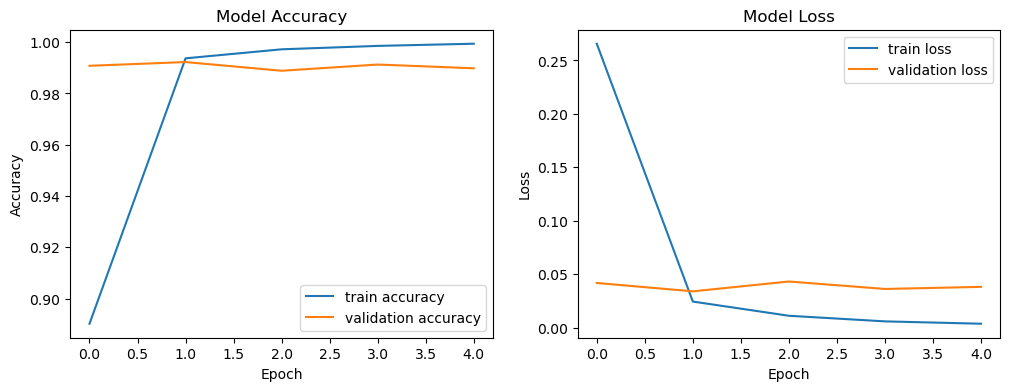

In [15]:
# Plotting Accuracy and Loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.show()

## Step 11: Evaluating Model


The project evaluates the model on the test set:


- Uses accuracy_score from Scikit-learn to calculate accuracy
- Uses classification_report from Scikit-learn to generate a classification report



In [16]:
#  Model Evaluation
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Print Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

65/65 [==============================] - 2s 22ms/step
Accuracy: 0.9898206495395055
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1614
           1       0.98      0.97      0.98       449

    accuracy                           0.99      2063
   macro avg       0.99      0.98      0.98      2063
weighted avg       0.99      0.99      0.99      2063



## Step 12: Visualizing Results


The project visualizes the results:


- Uses matplotlib to plot a pie chart showing correct and incorrect predictions.

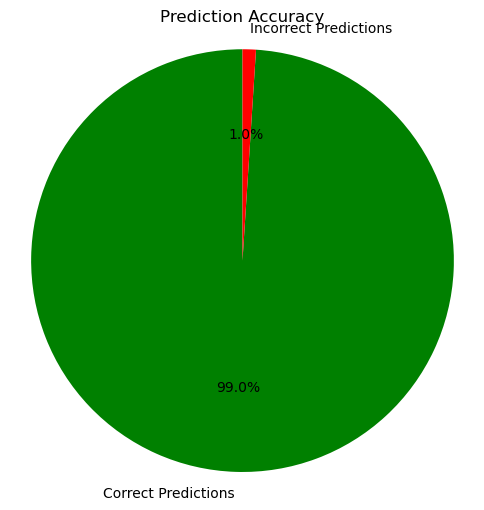

In [17]:
labels = ['Correct Predictions', 'Incorrect Predictions']
values = [accuracy * len(y_test), (1 - accuracy) * len(y_test)]

plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
plt.title('Prediction Accuracy')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()